Dataset: Aruzz22.5K: An Image Dataset of Rice Varieties\
Link Dataset: [link](https://www.kaggle.com/datasets/abrahametry/aruzz22-5k-an-image-dataset-of-rice-varieties) \
Size Gambar: 512x512 \
Jumlah Gambar: 22500 gambar(dari folder TRAIN_1)\
Jumlah Label: 20
1. 'BR29'
2. 'Paijam'
3. 'Chinigura_Polao'
4. 'Bashful'
5. 'BR28'
6. 'Red_Cargo'
7. 'Jirashail'
8. 'Lal_Aush'
9. 'Amon'
10. 'Shampakatari'
11. 'Najirshail'
12. 'Bashmoti'
13. 'Shorna5'
14. 'Katarivog'
15. 'Lal_Biroi'
16. 'Ganjiya'
17. 'Gutisharna'
18. 'Lal_Binni'
19. 'Katari_Polao'
20. 'Subol_Lota'

download gambar langsung dari kaggle dengan menggunakan Secrets google colab [tutorial](https://www.kaggle.com/discussions/general/74235)\
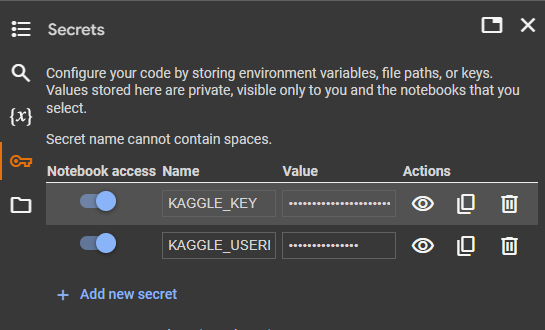

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
! pip install -q kaggle
! kaggle datasets download -d abrahametry/aruzz22-5k-an-image-dataset-of-rice-varieties
! unzip -q "aruzz22-5k-an-image-dataset-of-rice-varieties.zip" -d /content/Dataset

100% 768M/768M [00:31<00:00, 29.2MB/s]
100% 768M/768M [00:31<00:00, 25.8MB/s]


In [ ]:
import pandas as pd
from natsort import natsorted
import re

def read_folder(path:str):
  list_gambar = []
  list_label_gambar = []
  pattern = r"^\d{1,2}(_.+)"
  for folder in natsorted(os.listdir(path)):
    label_ = re.findall(pattern, folder)[0][1:]
    for image in natsorted(os.listdir(f'{path}/{folder}')):
      list_gambar.append(f'{path}/{folder}/{image}')
      list_label_gambar.append(label_)
  return list_gambar, list_label_gambar

list_gambar, list_label_gambar = read_folder('Dataset/1_TRAIN')
dataset = pd.DataFrame({'gambar':list_gambar, 'label':list_label_gambar})

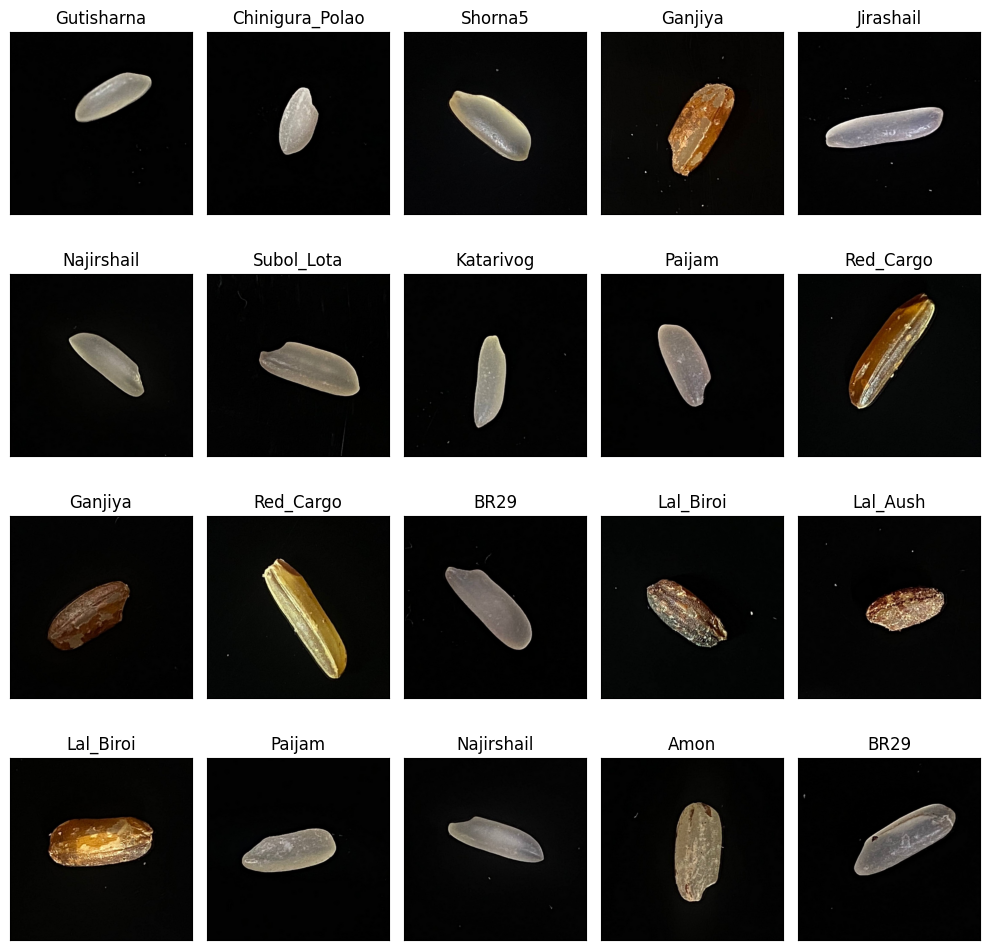

In [ ]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

random_index = np.random.randint(0, len(dataset), 20)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(dataset.gambar[random_index[i]])
    ax.imshow(image)
    ax.set_title(dataset.label[random_index[i]])
plt.tight_layout()
plt.show()

In [ ]:
print(dataset['label'].unique())

['Subol_Lota' 'Bashmoti' 'Ganjiya' 'Shampakatari' 'Katarivog' 'BR28'
 'BR29' 'Paijam' 'Bashful' 'Lal_Aush' 'Jirashail' 'Gutisharna' 'Red_Cargo'
 'Najirshail' 'Katari_Polao' 'Lal_Biroi' 'Chinigura_Polao' 'Amon'
 'Shorna5' 'Lal_Binni']


In [ ]:
df_train = pd.DataFrame({'gambar':[], 'label':[]})
df_test = pd.DataFrame({'gambar':[], 'label':[]})

In [ ]:
# split dataset
for label in dataset['label'].unique():
  grouped_df_ = dataset.groupby('label')
  group_ = grouped_df_.get_group(label)
  train_ = group_.iloc[:int(group_.shape[0]*0.8), :]
  test_ = group_.iloc[int(group_.shape[0]*0.8):, :]

  df_train = pd.concat([df_train, train_], ignore_index=True)
  df_test = pd.concat([df_test, test_], ignore_index=True)

In [ ]:
print(f'Total data\t: {dataset.shape[0]:,.0f}')
print(f'Total train\t: {df_train.shape[0]:,.0f} \t| target: {dataset.shape[0]*0.8:,.0f}\t/ 80%')
print(f'Total test\t: {df_test.shape[0]:,.0f} \t| target: {dataset.shape[0]*0.2:,.0f} \t/ 20%')

Total data	: 22,500
Total train	: 18,000 	| target: 18,000	/ 80%
Total test	: 4,500 	| target: 4,500 	/ 20%


In [ ]:
re.findall('(.+\/)', df_test['gambar'][0][16:])[0].replace('/','')

'1_Subol_Lota'

In [ ]:
os.system('mkdir test')
for folder in os.listdir('Dataset/1_TRAIN'):
  os.system(f'mkdir test/{folder}')

In [ ]:
import shutil
for gambar in df_test['gambar']:
  folder = re.findall('(.+\/)', gambar[16:])[0].replace('/','')
  shutil.copy(gambar, f'test/{folder}')

In [ ]:
os.system('mkdir train')
for folder in os.listdir('Dataset/1_TRAIN'):
  os.system(f'mkdir train/{folder}')

In [ ]:
for gambar in df_train['gambar']:
  folder = re.findall('(.+\/)', gambar[16:])[0].replace('/','')
  shutil.copy(gambar, f'train/{folder}')

In [ ]:
len(os.listdir('test/20_Lal_Binni'))

225

In [ ]:
len(os.listdir('train/20_Lal_Binni'))

900

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = os.path.join('./train', '')
test_dir = os.path.join('./test', '')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(384, 384),
    batch_size=225,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(384, 384),
    batch_size=225,
    class_mode='categorical'
)

Found 18000 images belonging to 20 classes.
Found 4500 images belonging to 20 classes.


In [ ]:
train_generator.class_indices

{'10_Lal_Aush': 0,
 '11_Jirashail': 1,
 '12_Gutisharna': 2,
 '13_Red_Cargo': 3,
 '14_Najirshail': 4,
 '15_Katari_Polao': 5,
 '16_Lal_Biroi': 6,
 '17_Chinigura_Polao': 7,
 '18_Amon': 8,
 '19_Shorna5': 9,
 '1_Subol_Lota': 10,
 '20_Lal_Binni': 11,
 '2_Bashmoti': 12,
 '3_Ganjiya': 13,
 '4_Shampakatari': 14,
 '5_Katarivog': 15,
 '6_BR28': 16,
 '7_BR29': 17,
 '8_Paijam': 18,
 '9_Bashful': 19}

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet',
                          input_shape=(384, 384, 3),
                          include_top=False)

for layer in base_model.layers:
  layer.trainable = False

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.MaxPooling2D(3, 3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 12, 12, 1280)      2257984   
 tional)                                                         
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 1280)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 20)                409620    
                                                                 
Total params: 2667604 (10.18 MB)
Trainable params: 409620 (1.56 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.3),
    metrics=['accuracy']
)

In [ ]:
class StopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92:
      print('\n Stop training karena sudah mencapai accuracy dan val 92%')
      self.model.stop_training = True

In [ ]:
my_call_back = StopTraining()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=300,
    validation_data=test_generator,
    validation_steps=10,
    verbose=1,
    callbacks=[my_call_back]
)

Epoch 1/300
32/32 [==============================] - 275s 8s/step - loss: 1837.7789 - accuracy: 0.3811 - val_loss: 294.1790 - val_accuracy: 0.6862
Epoch 2/300
32/32 [==============================] - 265s 8s/step - loss: 164.4159 - accuracy: 0.7826 - val_loss: 102.1990 - val_accuracy: 0.8324
Epoch 3/300
32/32 [==============================] - 262s 8s/step - loss: 81.1412 - accuracy: 0.8490 - val_loss: 85.4556 - val_accuracy: 0.8547
Epoch 4/300
32/32 [==============================] - 264s 8s/step - loss: 69.5399 - accuracy: 0.8644 - val_loss: 51.3477 - val_accuracy: 0.8951
Epoch 5/300
32/32 [==============================] - 263s 8s/step - loss: 59.4436 - accuracy: 0.8786 - val_loss: 47.6496 - val_accuracy: 0.9004
Epoch 6/300
32/32 [==============================] - 264s 8s/step - loss: 59.5430 - accuracy: 0.8778 - val_loss: 72.6647 - val_accuracy: 0.8787
Epoch 7/300
32/32 [==============================] - 259s 8s/step - loss: 73.6620 - accuracy: 0.8753 - val_loss: 71.5455 - val_accu

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)

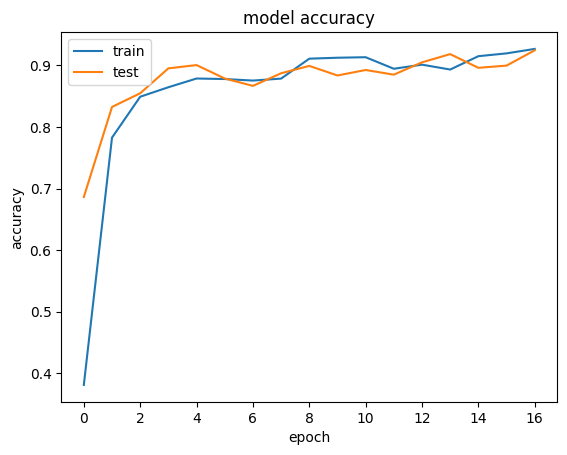

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

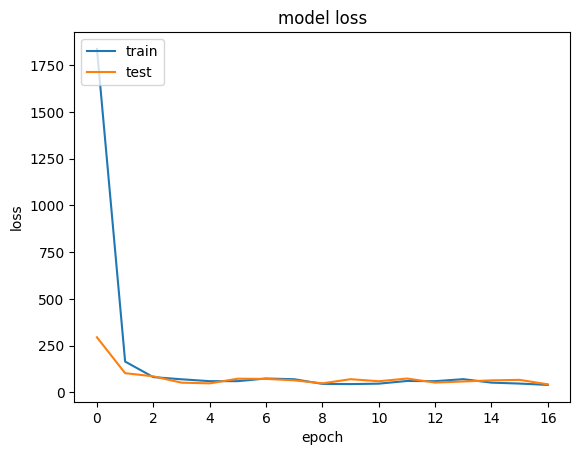

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()